# Deep-learning Lab
___

### Imports

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

## Ploting 10 random images

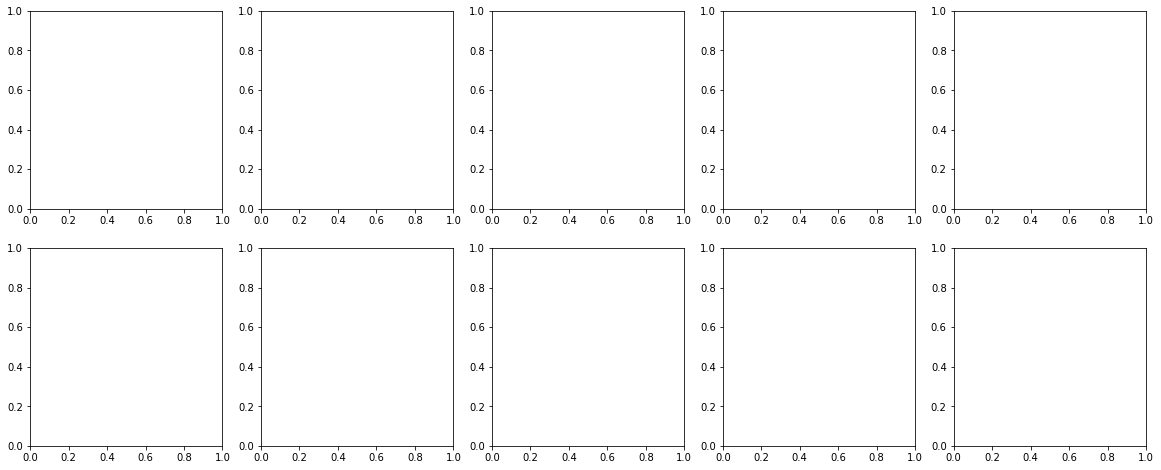

In [3]:
fig, axes = plt.subplots(2, 5, figsize = (20, 9))

# X_train = 

for i, ax in enumerate(axes.flatten()):
    plt.imshow